<a href="https://colab.research.google.com/github/SaifuliAnna/ML_DataScience/blob/main/payments_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Import the necessary libraries.*

In [1]:
import pandas as pd
import numpy as np

# *Read csv file*

In [2]:
# read csv file
credit_data = pd.read_csv("/content/drive/MyDrive/Pet_project/credit_card.csv")
# print first 5 data (head())
print(credit_data.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0      0.0             0.0  
1  M2044282225             0.0             0.0      0.0             0.0  
2   C553264065             0.0             0.0      1.0             0.0  
3    C38997010         21182.0             0.0      1.0             0.0  
4  M1230701703             0.0             0.0      0.0             0.0  


In [3]:
# first 10 data
print(credit_data.head(10))

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815      170136.00       160296.36   
1     1   PAYMENT   1864.28  C1666544295       21249.00        19384.72   
2     1  TRANSFER    181.00  C1305486145         181.00            0.00   
3     1  CASH_OUT    181.00   C840083671         181.00            0.00   
4     1   PAYMENT  11668.14  C2048537720       41554.00        29885.86   
5     1   PAYMENT   7817.71    C90045638       53860.00        46042.29   
6     1   PAYMENT   7107.77   C154988899      183195.00       176087.23   
7     1   PAYMENT   7861.64  C1912850431      176087.23       168225.59   
8     1   PAYMENT   4024.36  C1265012928        2671.00            0.00   
9     1     DEBIT   5337.77   C712410124       41720.00        36382.23   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0            0.00      0.0             0.0  
1  M2044282225            

In [5]:
credit_data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1482251,141,CASH_OUT,53873.42,C1526858587,0.0,0.0,C1092762758,94661.51,148534.93,0.0,0.0
1482252,141,CASH_OUT,36915.50,C716561564,0.0,0.0,C1984516323,260083.79,296999.29,0.0,0.0
1482253,141,CASH_OUT,152740.27,C580703731,0.0,0.0,C446755339,774758.25,927498.53,0.0,0.0
1482254,141,CASH_OUT,93369.06,C773516810,0.0,0.0,C1297600477,1022446.10,1115815.16,0.0,0.0
1482255,141,CASH_OUT,121150.00,C1699297353,0.0,0.0,NaN,NaN,NaN,NaN,NaN


# *Dataset has any null values or not*

In [7]:
print(credit_data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64


So this dataset has null values. Before moving forward, let's copy this dataset, remove the rows with missing data, and look at the transaction type mentioned in the dataset.



In [8]:
# copy dataset
credit_data_copy = credit_data.copy()

In [9]:
print(credit_data_copy.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0      0.0             0.0  
1  M2044282225             0.0             0.0      0.0             0.0  
2   C553264065             0.0             0.0      1.0             0.0  
3    C38997010         21182.0             0.0      1.0             0.0  
4  M1230701703             0.0             0.0      0.0             0.0  


In [10]:
# remove the rows with missing data ('Null')
credit_data_copy.dropna(subset=['nameDest', 'isFlaggedFraud'], inplace=True)

In [11]:
print(credit_data_copy.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [12]:
# Exploring transaction type
print(credit_data_copy.type.value_counts())

CASH_OUT    530999
PAYMENT     494177
CASH_IN     324931
TRANSFER    122402
DEBIT         9746
Name: type, dtype: int64


# *Visualization*

In [13]:
type = credit_data_copy["type"].value_counts()
transactions = type.index
quantity = type.values

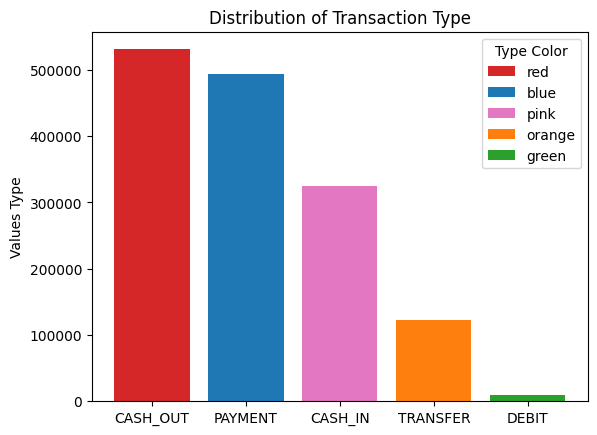

In [14]:
# first
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

bar_labels = ['red', 'blue', 'pink', 'orange', 'green']
bar_colors = ['tab:red', 'tab:blue', 'tab:pink', 'tab:orange', 'tab:green']

ax.bar(transactions, quantity, label=bar_labels, color=bar_colors)

ax.set_ylabel('Values Type')
ax.set_title('Distribution of Transaction Type')
ax.legend(title='Type Color')

plt.show()

In [15]:
# second
import plotly.express as px

figure = px.pie(credit_data_copy, 
             values=quantity, 
             names=transactions,
             hole = 0.5, 
             title="Distribution of Transaction Type")
figure.show()

# *Correlation between the features of the data with the isFraud column*

In [16]:
# Checking correlation
correlation = credit_data_copy.corr(numeric_only=True)
print(correlation["isFraud"].sort_values(ascending=False))

isFraud           1.000000
amount            0.132745
step              0.006374
oldbalanceOrg     0.004527
newbalanceDest   -0.000013
oldbalanceDest   -0.007374
newbalanceOrig   -0.009345
isFlaggedFraud         NaN
Name: isFraud, dtype: float64


In [17]:
credit_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1482255 entries, 0 to 1482254
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1482255 non-null  int64  
 1   type            1482255 non-null  object 
 2   amount          1482255 non-null  float64
 3   nameOrig        1482255 non-null  object 
 4   oldbalanceOrg   1482255 non-null  float64
 5   newbalanceOrig  1482255 non-null  float64
 6   nameDest        1482255 non-null  object 
 7   oldbalanceDest  1482255 non-null  float64
 8   newbalanceDest  1482255 non-null  float64
 9   isFraud         1482255 non-null  float64
 10  isFlaggedFraud  1482255 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 135.7+ MB


# *Data transformation*

In [18]:
# transform the categorical features into numerical
credit_data_copy["type"] = credit_data_copy["type"].map({"CASH_OUT": 1, "PAYMENT": 2, 
                                                         "CASH_IN": 3, "TRANSFER": 4,
                                                         "DEBIT": 5})

In [19]:
# transform the values of the isFraud column into No Fraud and Fraud labels
credit_data_copy["isFraud"] = credit_data_copy["isFraud"].map({0: "No Fraud", 1: "Fraud"})
print(credit_data_copy.head())

   step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     2   9839.64  C1231006815       170136.0       160296.36   
1     1     2   1864.28  C1666544295        21249.0        19384.72   
2     1     4    181.00  C1305486145          181.0            0.00   
3     1     1    181.00   C840083671          181.0            0.00   
4     1     2  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0  No Fraud             0.0  
1  M2044282225             0.0             0.0  No Fraud             0.0  
2   C553264065             0.0             0.0     Fraud             0.0  
3    C38997010         21182.0             0.0     Fraud             0.0  
4  M1230701703             0.0             0.0  No Fraud             0.0  


# Online Payments Fraud Detection Model

## *Split the data*

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [21]:
X = np.array(credit_data_copy[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
Y = np.array(credit_data_copy[["isFraud"]])

## *Training a machine learning model*

In [22]:
# divide the data into trained and test data
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=42)

# Creating an instance of the classifier
model_clf = DecisionTreeClassifier()

# Model training on training data
model_clf.fit(X_train, Y_train)

# model accuracy on test data
print(model_clf.score(x_test, y_test))

0.9995142552588615


## *Prediction*

In [37]:
# features = [type, amount, oldbalanceOrg, newbalanceOrig]
features = np.array([[4, 19000.60, 19000.60, 0.0]])

# y_pred = model_clf.predict(x_test)
print(model_clf.predict(features))

['Fraud']


### *tree*

In [24]:
# from sklearn import tree

In [25]:
# clf = tree.DecisionTreeClassifier()
# clf.fit(X_train, Y_train)

# tree.plot_tree(clf)

In [26]:
# import graphviz 

In [27]:
# dot_data = tree.export_graphviz(clf, out_file=None) 
# graph = graphviz.Source(dot_data) 
# graph.render("Fraud") 